In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Matplotlib created a temporary cache directory at /tmp/matplotlib-to459idq because the default path (/home/whlin/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
train_df = pd.read_json("../data/train.jsonl", lines = True)

In [3]:
train_df

,date_publish,title,source_domain,maintext,split,id
0,2015-03-02 00:00:00,榜首進台大醫科卻休學 、27歲拿到法國天文博士 李悅寧跌破眾人眼鏡返台任教,udn.com,從小就很會念書的李悅寧， 在眾人殷殷期盼下，以榜首之姿進入臺大醫學院， 但始終忘不了對天文的...,train,0
1,2015-10-20 00:00:00,「猩人」真有其事？人猿混種曾成功受孕 揭秘前蘇聯可怕實驗,udn.com,人類與猩猩混種誕下後代，不一定僅限於科幻電影情節。前蘇聯科學家早在1920年代以人工授精技術...,train,1
2,2015-12-10 00:00:00,跑步小品／謝謝三浦春馬 再次喚醒我對跑步的熱情,udn.com,從得知三浦春馬離世的消息那刻開始，心中頓時感到很鬱悶，那種很驚訝、很可惜、很無奈的感覺很重很...,train,2
3,2016-04-22 00:00:00,【身體不適特輯（下）】「拉肚子」、「想吐」、「嘔吐」英文怎麼說？,udn.com,嗨，歡迎回到【身體不適特輯】的下集，在這集裡，小編會繼續講自己食物中毒的故事，以及介紹各種症...,train,3
4,2016-04-29 00:00:00,中職／球彈、好球帶小 投手被打趴百害無一利,udn.com,今年中華職棒官辦熱身賽眾家打者真的打瘋了！數據顯示，官辦熱身賽打了20場，竟然出現多達66轟...,train,4
...,...,...,...,...,...,...
21705,2021-01-13 14:52:07,TDDI IC需求大 手機用年成長8.6％ 平板電腦46.2％,udn.com,根據TrendForce旗下顯示器研究處表示，預期在2021年手機市場回溫下，TDDI IC...,train,21705
21706,2021-01-13 17:31:06,挪威電信與合勤科技合作進行5G部署計畫,udn.com,合勤科技今天正式宣布，北歐挪威電信 (Telenor) 採用合勤 5G NR 戶外型路由器 ...,train,21706
21707,2021-01-13 18:00:09,Gowin最新邊緣運算解決方案 採華邦高速記憶體裝置,udn.com,華邦電子（2344）今（13）日宣佈FPGA製造商Gowin將在其最新GoAI 2.0機器學...,train,21707
21708,2021-01-13 20:25:06,CES線上大展 LG發表新筆電搶遠距工作商機,udn.com,LG電子於2021年美國消費性電子展（CES）線上大展推出新款gram系列筆記型電腦，螢幕採...,train,21708


In [4]:
train_df.iloc[0]

date_publish                                   2015-03-02 00:00:00
title                        榜首進台大醫科卻休學 、27歲拿到法國天文博士 李悅寧跌破眾人眼鏡返台任教
source_domain                                              udn.com
maintext         從小就很會念書的李悅寧， 在眾人殷殷期盼下，以榜首之姿進入臺大醫學院， 但始終忘不了對天文的...
split                                                        train
id                                                               0
Name: 0, dtype: object

In [5]:
print(train_df.source_domain.unique())
print(train_df.split.unique())

['udn.com']
['train']


# Text length

In [6]:
train_df['title_length'] = train_df.apply(lambda x: len(x['title']), axis=1)
train_df['maintext_length'] = train_df.apply(lambda x: len(x['maintext']), axis = 1)


In [7]:
print(train_df['title_length'].mean())
print(train_df['maintext_length'].mean())
print(train_df['title_length'].quantile(.995))
print(train_df['maintext_length'].quantile(.99))

25.68825426070935
1436.1695532012898
51.0
4762.749999999996


/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

<Figure size 500x500 with 0 Axes>

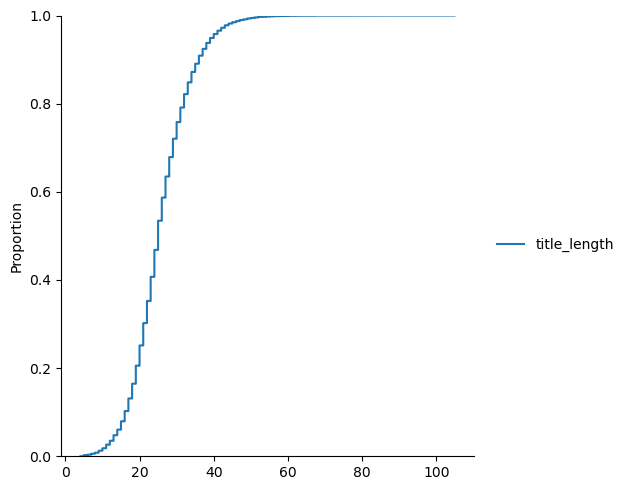

<Figure size 500x500 with 0 Axes>

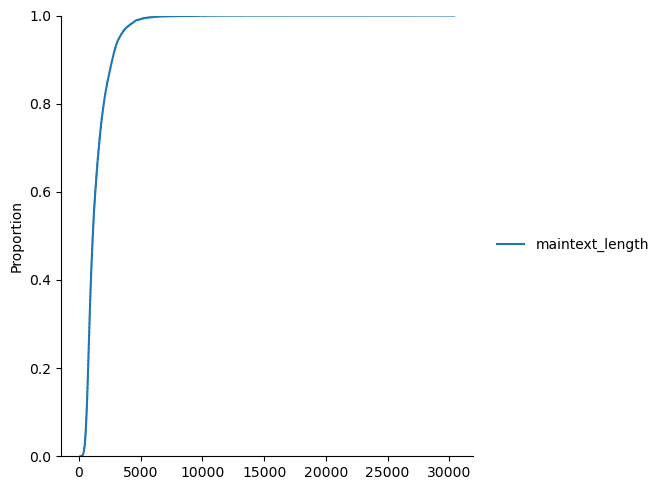

In [8]:
for column in ['title_length', 'maintext_length']:
    plt.figure(figsize = (5, 5))
    sns.displot(train_df.loc[:, [column]], kind='ecdf')

/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/whlin/anaconda3/envs/ADL_hw1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

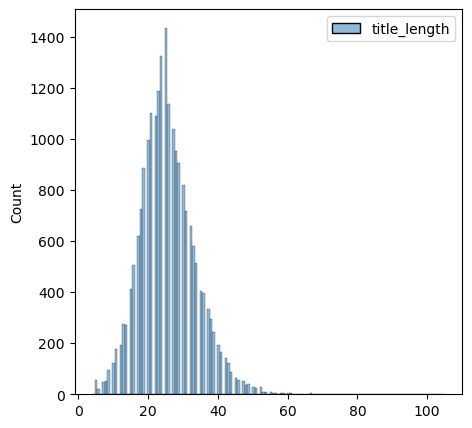

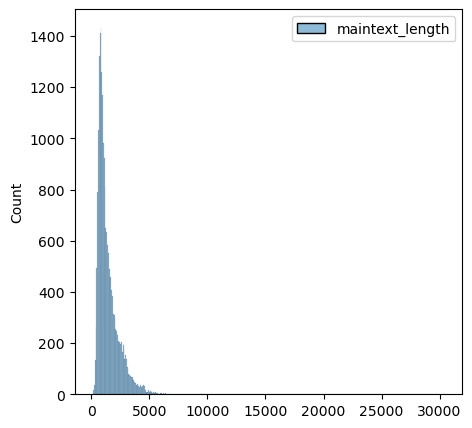

In [10]:
for column in ['title_length', 'maintext_length']:
    plt.figure(figsize = (5, 5))
    sns.histplot(train_df.loc[:, [column]])

In [3]:
from rouge import Rouge
rouge = Rouge()
rouge.get_scores(' '.join(list('我perko是一哈哈哈，個人')), ' '.join(list('我是人'))) # hyps refs

[{'rouge-1': {'r': 1.0, 'p': 0.25, 'f': 0.39999999680000003},
  'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
  'rouge-l': {'r': 1.0, 'p': 0.25, 'f': 0.39999999680000003}}]

# 看每種長度的maintext會包含多少percent title裡面的字

In [6]:
train_sample_df = train_df[:1000]

In [7]:
train_sample_df['title_for_matric'] = train_sample_df.apply(lambda x: ' '.join(list(x['title'])), axis=1)
train_sample_df['maintext_for_matric_2048'] = train_sample_df.apply(lambda x: ' '.join(list(x['maintext'][:2048])), axis = 1)
train_sample_df['maintext_for_matric_1024'] = train_sample_df.apply(lambda x: ' '.join(list(x['maintext'][:1024])), axis = 1)
train_sample_df['maintext_for_matric_768'] = train_sample_df.apply(lambda x: ' '.join(list(x['maintext'][:768])), axis = 1)
train_sample_df['maintext_for_matric_640'] = train_sample_df.apply(lambda x: ' '.join(list(x['maintext'][:640])), axis = 1)
train_sample_df['maintext_for_matric_512'] = train_sample_df.apply(lambda x: ' '.join(list(x['maintext'][:512])), axis = 1)
train_sample_df['maintext_for_matric_384'] = train_sample_df.apply(lambda x: ' '.join(list(x['maintext'][:384])), axis = 1)
train_sample_df['maintext_for_matric_256'] = train_sample_df.apply(lambda x: ' '.join(list(x['maintext'][:256])), axis = 1)
train_sample_df['maintext_for_matric_128'] = train_sample_df.apply(lambda x: ' '.join(list(x['maintext'][:128])), axis = 1)

/tmp/ipykernel_46241/736605174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sample_df['title_for_matric'] = train_sample_df.apply(lambda x: ' '.join(list(x['title'])), axis=1)
/tmp/ipykernel_46241/736605174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sample_df['maintext_for_matric_2048'] = train_sample_df.apply(lambda x: ' '.join(list(x['maintext'][:2048])), axis = 1)
/tmp/ipykernel_46241/736605174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [8]:
for length in ["2048", "1024", "768", "640", "512", "384", "256", "128"]:
    scores = rouge.get_scores(train_sample_df["maintext_for_matric_{}".format(length)], train_sample_df["title_for_matric".format(length)], avg=True)
    print(length)
    print("average rouge-1 {}".format(scores['rouge-1']))
    print("average rouge-2 {}".format(scores['rouge-2']))
    print("average rouge-l {}".format(scores['rouge-l']))
    print()

2048
average rouge-1 {'r': 0.8686659631009506, 'p': 0.05702269854120812, 'f': 0.10535348168421589}
average rouge-2 {'r': 0.5162820065745882, 'p': 0.018216678832354647, 'f': 0.03463447845466765}
average rouge-l {'r': 0.7384935366227233, 'p': 0.048298610773574044, 'f': 0.08923531447755514}

1024
average rouge-1 {'r': 0.8314107621691877, 'p': 0.06299013374626256, 'f': 0.11577774245784385}
average rouge-2 {'r': 0.4829757456353315, 'p': 0.020485740177457454, 'f': 0.03888001859700784}
average rouge-l {'r': 0.6870681486082031, 'p': 0.052080436205921884, 'f': 0.09568533375897798}

768
average rouge-1 {'r': 0.806374982421948, 'p': 0.06847891248851108, 'f': 0.12496993800596802}
average rouge-2 {'r': 0.46443411653451055, 'p': 0.022913877255857678, 'f': 0.043283630971586474}
average rouge-l {'r': 0.6585527368887473, 'p': 0.05592720929165556, 'f': 0.10201407968091827}

640
average rouge-1 {'r': 0.785883998750392, 'p': 0.07316068763552754, 'f': 0.13254065526607806}
average rouge-2 {'r': 0.4502129960

# 看title 裡面有沒有\n

In [6]:
train_df['title_newline'] = train_df.apply(lambda x: "\n" in x['title'], axis=1)

In [8]:
train_df["title_newline"].sum()

0

In [9]:
predict_df = pd.read_json("../data/predict_b.jsonl", lines = True)

In [11]:
predict_df['title_newline'] = predict_df.apply(lambda x: "\n" in x['title'], axis=1)

In [12]:
predict_df["title_newline"].sum()

252

# Analyze prediction

In [4]:
public_df = pd.read_json("../data/public.jsonl", lines = True)

In [7]:
public_df['title'][:10]

0               Anker新款真無線藍牙耳機Liberty Air 2 Pro 引進台灣市場
1                        藍染、客家美食、舊山線自行車 「苗栗一日遊」超人氣美食美景
2                  華碩打造對應軍規防護與2 in 1設計的15.6吋Chromebook
3                                      產業發展變革 台灣的優勢與機會
4                  全球Windows 7裝置粗估至少還有1億台以上 市佔率穩穩卡在20％
5                                             強勢台幣理財攻略
6                          「不需治療，只需到台灣！」 美國「哈台馬克杯」賣到缺貨
7    ZenBook Duo 14、ZenBook Pro Duo 15 OLED更新 第二螢幕更...
8                             不出國更要怒吃雞加酒！「周末炸虎俱樂部」限量開賣
9                         NBA／紐約記者爆料厄文狀況 「不喜歡奈許、跟KD疏離」
Name: title, dtype: object

In [32]:
predict_df = pd.read_json("../data/predict_b.jsonl", lines = True)

In [16]:
predict_df['title'] = predict_df.apply(lambda x: x['title'].replace(" ", ""), axis = 1)
predict_df['id'] = predict_df.apply(lambda x: str(x['id']), axis = 1)

In [33]:
predict_df[:10]

,id,title
0,21710,Anker推出真無線藍牙耳機 支援App設定手勢操作
1,21711,全台最熱門的鐵道自行車!\n三條「最美C路線」讓女孩走訪苗栗
2,21712,華碩換上Intel第11代Core處理器的Chromebook Flip CX5 擴展企業應用需求
3,21713,理財我最大邀請工研院產科國際所長蘇孟宗 掌握今年產業發展重點
4,21714,Windows 7正式退出消費市場 市佔率恐落在20%上下
5,21715,台灣錢回流 投資什麼才好?
6,21716,美國網購平台上架「哈台馬克杯」 熱銷1萬件、亞馬遜買到缺貨
7,21717,華碩更新雙螢幕筆電、ZenBook Duo 14、Pro Duo 15OLED
8,21718,台灣首款炸物專門啤酒!臺虎推「周末炸雞俱樂部」
9,21719,NBA/沒爆彈要處理 紐媒爆料厄文不喜歡奈許
